Project code

In [63]:
!pip install astral
!pip install skyfield

In [64]:
from astral import LocationInfo
from astral.moon import phase as moon_phase
from datetime import datetime
import numpy as np
from skyfield.api import load, Topos
import matplotlib.pyplot as plt

In [ ]:

def calculate_lux_intensity(fractional_illumination):
    """Convert fractional moon illumination to lux intensity."""
    return 10**(-1.93 + 0.419 * fractional_illumination + 0.026 * fractional_illumination**2)

def compute_visibility(lux, reflectivity, target_size):
    """Calculate a basic visibility score."""
    return lux * reflectivity * target_size

def generate_sea_scene(img_size=(200, 200), target_position=(90, 80), target_size=(20, 40),
                       lux_intensity=0.25, reflectivity_sea=0.05, reflectivity_target=0.6):
    """Generate a grayscale sea scene with a reflective target."""
    sea = np.ones(img_size) * lux_intensity * reflectivity_sea
    y, x = target_position
    h, w = target_size
    sea[y:y+h, x:x+w] = lux_intensity * reflectivity_target
    return sea

def display_scene(sea_array, title="Top-Down Satellite View"):
    """Visualize a grayscale scene."""
    plt.imshow(sea_array, cmap='gray', origin='upper')
    plt.title(title)
    plt.axis('off')
    plt.show()


In [66]:
# Function to estimate moon illumination based on its phase
def get_moon_illumination(phase):
    """Returns approximate lux intensity based on moon phase."""
    # Lux values based on different moon phases (approximate)
    lux_values = {0: 0.3,  # New Moon
                  1: 0.2,  # Waxing Crescent
                  7: 0.03, # First Quarter
                  14: 0.25, # Full Moon
                  21: 0.03, # Last Quarter
                  28: 0.2}  # Waning Crescent
    return lux_values.get(phase, 0.1)  # Default for intermediate phases

In [67]:
import random
from skyfield.api import Topos

# Random North Atlantic location
latitude = random.uniform(0, 60)      # degrees North
longitude = random.uniform(-80, -10)  # degrees West

observer = Topos(latitude_degrees=latitude, longitude_degrees=longitude)

print(f" Observer location: Latitude {latitude:.2f}° N, Longitude {longitude:.2f}° W")


 Observer location: Latitude 40.66° N, Longitude -39.91° W


In [68]:
eph = load('de421.bsp')  # load ephemeris data
ts = load.timescale()
date = datetime.utcnow()
t = ts.utc(date.year, date.month, date.day, date.hour, date.minute, date.second)

earth = eph['earth']
moon = eph['moon']
sun = eph['sun']
astro_position = earth + observer

moon_pos = astro_position.at(t).observe(moon).apparent()
sun_pos = astro_position.at(t).observe(sun).apparent()

phase_angle = moon_pos.separation_from(sun_pos)
fractional_illumination = (1 + np.cos(np.radians(phase_angle.degrees))) / 2
lux = calculate_lux_intensity(fractional_illumination)

/tmp/ipykernel_2443/199144691.py:3: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  date = datetime.utcnow()


In [69]:
# Compute fractional illumination (Skyfield provides this directly)
fractional_illumination = (1 + np.cos(np.radians(phase_angle.degrees))) / 2

In [70]:
# Improved Lux Calculation using Scientific Model
lux_intensity = 10**(-1.93 + 0.419 * fractional_illumination + 0.026 * fractional_illumination**2)

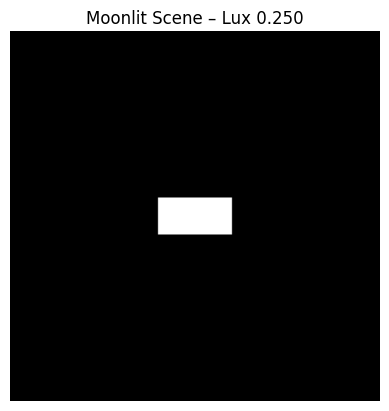

In [71]:
lux = 0.25  # Simulate full moonlight
scene = generate_sea_scene(lux_intensity=lux)
display_scene(scene, title=f"Moonlit Scene – Lux {lux:.3f}")

In [72]:
# Simulate optical observation - Basic Target Visibility
# Assuming a 15m long target with reflectivity of 0.7 (low reflectance on dark water)
target_size = 15  # meters
reflectivity = 0.7  # Fraction of light reflected

In [73]:
# Compute basic visibility metric (lux * reflectivity * target size)
visibility_score = lux_intensity * reflectivity * target_size

In [74]:
# Print results
print(f"Date: {date}")
print(f"Fractional Illumination: {fractional_illumination:.3f} (0 = New, 1 = Full)")
print(f"Estimated Lux Intensity: {lux_intensity:.3f} lux")

Date: 2025-04-10 21:41:49.083441
Fractional Illumination: 0.037 (0 = New, 1 = Full)
Estimated Lux Intensity: 0.012 lux


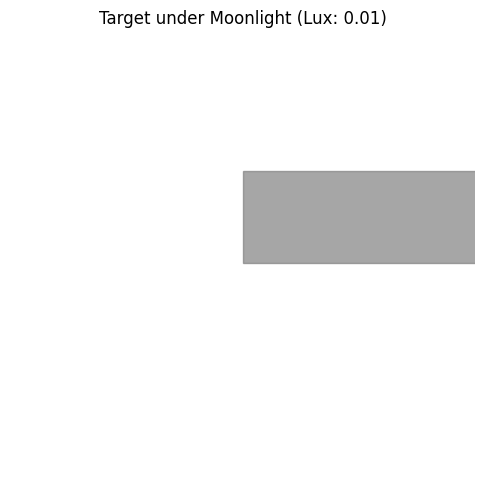

In [75]:
# Render simple scene
fig, ax = plt.subplots(figsize=(6, 6))
ax.set_facecolor("black")  # Dark background
ax.set_facecolor('black')  # Set the axis background to black
ax.add_patch(plt.Rectangle((0, 0), 15, 2, color='gray', alpha=reflectivity))  # Target
plt.xlim(-10, 10)
plt.ylim(-5, 5)
plt.title(f"Target under Moonlight (Lux: {lux_intensity:.2f})")
plt.axis("off")
plt.show()